# ANÁLISE DE AÇÕES PREFERENCIAIS DA PETROBRAS (PETR4)

## INDEX:

### 1) Introdução (Definição do ativo e do período)

### 2) Retornos (Simples, Logarítimicos e de Índices)

### 3) Riscos

### 4) Diversificações

### 5) Correlações

### 6) Markowitz

### 7) Beta e Sharpe

### 8) Precificação de CALLs via Black-Scholes

In [5]:
import jupyter_core  # opcional
import notebook  # opcional
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt
from scipy.stats import norm


# Obs.:

## Podemos plotar gráficos line charts melhores using Plotly em vez de matplotlib.

## Exemplo:

In [6]:
# import plotly

# pd.options.plotting.backend = "plotly"  # comunica ao pandas que os plots devem ser feitos via plotly



# dados_plt = (dados / dados.iloc[0] * 100) # aplicação da fórmula
# dados_plt.plot(kind='line')

# 1

## INTRO

### Definindo o ativo e delimitando períodos

#### Vamos iniciar definindo o ativo ('acao') que vamos analisar e o período ('start=' e 'end=') em que o vamos analisar.

In [7]:
# definir nossa acao (PETR4) e o período de análise:
acao = "PETR4.SA"
acao = wb.get_data_yahoo(acao, start="2011-1-1")

[*********************100%***********************]  1 of 1 completed


In [8]:
# Visualizar o dataset e verificar se estamos up-to-date:
acao.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-04,24.629999,24.760000,24.100000,24.27,24.27,57505700
2023-04-05,24.190001,24.530001,23.270000,24.35,24.35,93626400
2023-04-06,24.340000,24.420000,23.950001,24.00,24.00,29565400
2023-04-10,24.030001,24.660000,24.030001,24.51,24.51,41455900
2023-04-11,24.700001,25.530001,24.629999,25.50,25.50,54622900


# 2

## Retornos (Simples, Logarítimicos e de Índices)

### F O R M U L A

simple rate of return = (p1/ p0) -1

where: p0 = beginning stock price, p1 = ending stock price

In [9]:
acao['simple_return'] = (acao['Adj Close'] / acao['Adj Close'].shift(1)) -1
# 'shift(1)' indica o período de tempo - no caso, UM dia útil antes.
print(acao['simple_return'])

Date
2011-01-03         NaN
2011-01-04   -0.003704
2011-01-05    0.011896
2011-01-06   -0.004041
2011-01-07   -0.014017
                ...   
2023-04-04   -0.008983
2023-04-05    0.003296
2023-04-06   -0.014374
2023-04-10    0.021250
2023-04-11    0.040392
Name: simple_return, Length: 3047, dtype: float64


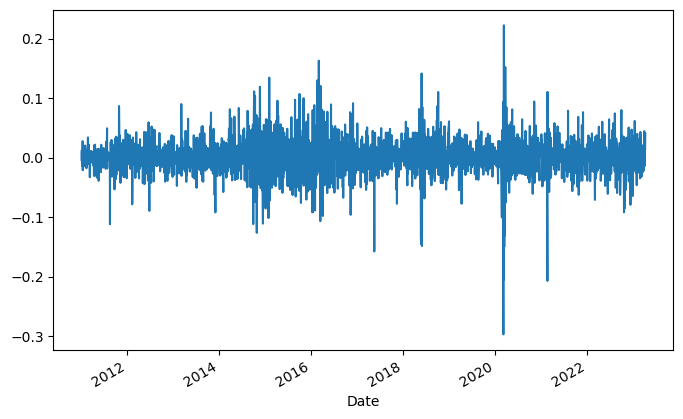

In [10]:
acao['simple_return'].plot(figsize=(8, 5))
plt.show() # not necessary on vscode
# Os mergulhos no gráfico são os pontos de perda.
# No começo de 2020 tivemos vários circuit breaks em razão da COVID-19 impactar os mercados.

____________

## 2.1

### Cálculo do Average Return (Mean Return), ou Retorno Médio:

In [11]:
# Daily (Diário):
avg_returns_d = acao['simple_return'].mean()
# este valor só tem utilidade para calcular o anual, não merecendo atenção isoladamente.
avg_returns_d

0.0007426176650470911

In [12]:
# Annual (Anual):
avg_returns_a = acao['simple_return'].mean() * 251
# 251 representa um número aproximado de dias úteis no ano (em SP).
avg_returns_a

0.18639703392681986

In [13]:
# conversão para percentual:
print(str(round(avg_returns_a, 5) * 100) + ' %')
# multiplica por 100, convert para string, e acrescenta o sinal percentual ao final.

18.64 %


_________

## 2.2

### Cálculo do Log Return, ou Retorno Logarítmico:


        F O R M U L A

### LOGARITHMIC RATE OF RETURN = ln(pT/pT-1)

pT = price in time "t"

pT-1 = price in the day before

ln = logarthim

In [14]:
acao['log_return'] = np.log(acao['Adj Close'] / acao['Adj Close'].shift(1))
# usamos a função 'np.log' do numpy para o cálculo logarítimico.
# 'shift(1)' indica o período de tempo - no caso, UM dia útil antes.
print(acao['log_return'])  # checar se o array foi populado

Date
2011-01-03         NaN
2011-01-04   -0.003711
2011-01-05    0.011826
2011-01-06   -0.004049
2011-01-07   -0.014116
                ...   
2023-04-04   -0.009024
2023-04-05    0.003291
2023-04-06   -0.014478
2023-04-10    0.021027
2023-04-11    0.039597
Name: log_return, Length: 3047, dtype: float64


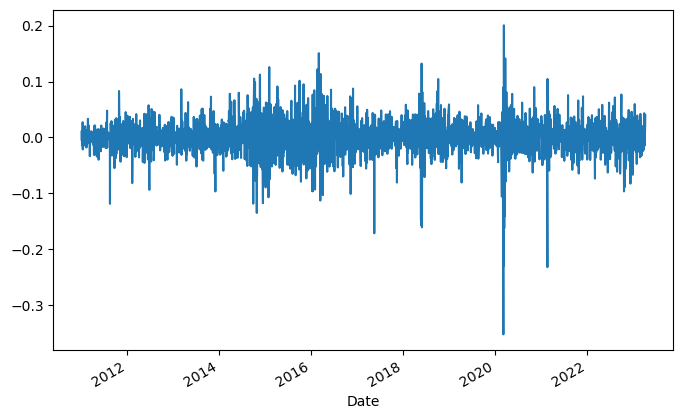

In [15]:
acao['log_return'].plot(figsize=(8, 5))
plt.show() # not necessary on vscode
# Os mergulhos no gráfico representam os pontos de perda.
# No começo de 2020 tivemos vários circuit breaks em razão da COVID-19 impactar os mercados.

In [16]:
# Daily (Diário):
avg_returns_d = acao['log_return'].mean()
# este valor só tem utilidade para calcular o anual, não merecendo atenção isoladamente.
avg_returns_d

0.0002978011407205913

In [17]:
# Annual (Anual):
avg_returns_a = acao['log_return'].mean() * 251
# 251 representa um número aproximado de dias úteis no ano (em SP)
avg_returns_a

0.07474808632086842

In [18]:
# conversão para percentual:
print(str(round(avg_returns_a, 5) * 100) + ' %')
# multiplica por 100, convert para string, e acrescenta o sinal percentual ao final.

7.475 %


___________________

## 2.3

### Comparação ante o Índice da Bolsa:

In [21]:
ativos = ['PETR4.SA', '^BVSP']

dados = pd.DataFrame()

for ativo in ativos:
    dados[ativo] = wb.get_data_yahoo(ativo, start="2011-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
dados.tail()  # testagem de população do dataset

,PETR4.SA,^BVSP
Date,,
2023-04-04,24.27,101869.00000
2023-04-05,24.35,100978.00000
2023-04-06,24.00,100822.00000
2023-04-10,24.51,101847.00000
2023-04-11,25.51,105584.28125


### Primeiro, uma comparação básica entre a ação e o índice:

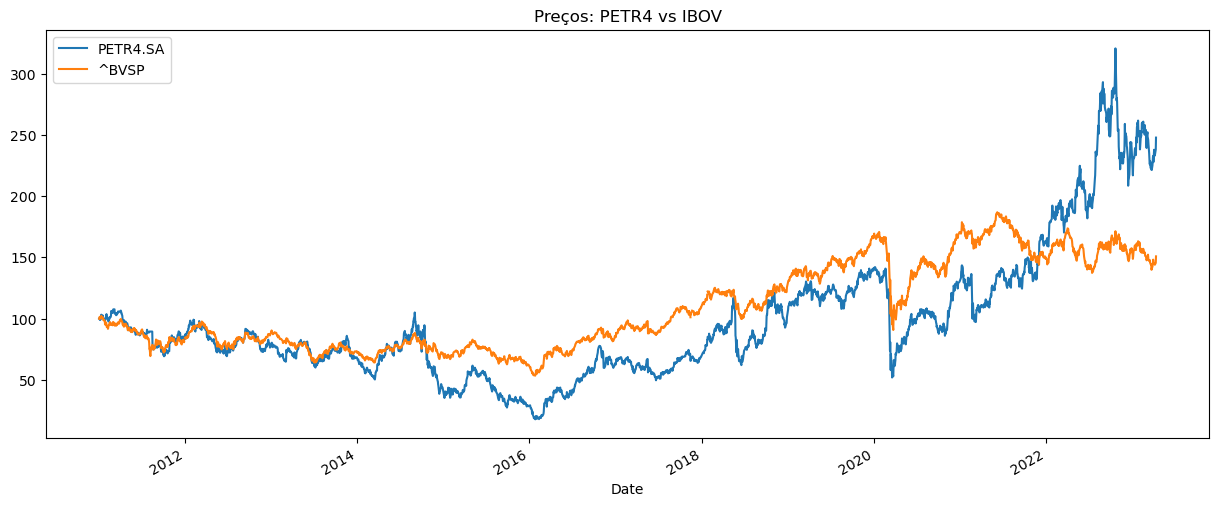

In [23]:
(dados / dados.iloc[0] * 100).plot(figsize=(15,6))  # aplicação da fórmula
plt.title("Preços: PETR4 vs IBOV")
plt.show()

#### Obs.: O gráfico das duas é idêntico porque a PETR4 representa grande proporção na composição da carteira teórica do ibovespa.

### Agora vamos analisar o retorno anual médio

In [24]:
retorno_indice = (dados / dados.shift(1)) -1

retorno_indice.tail()

,PETR4.SA,^BVSP
Date,,
2023-04-04,-0.008983,0.003576
2023-04-05,0.003296,-0.008747
2023-04-06,-0.014374,-0.001545
2023-04-10,0.021250,0.010166
2023-04-11,0.040800,0.036695


In [25]:
retorno_anual_indice = retorno_indice.mean() * 251

print(str(round(retorno_anual_indice, 5) * 100) + " %") 

# dados positivos indicam um retorno positivo no período analisado

PETR4.SA    18.643
^BVSP        5.607
dtype: float64 %


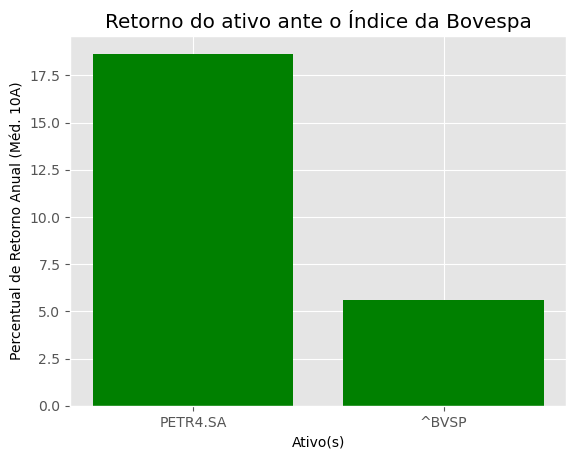

In [26]:
# plotagem de "bar graph":

plt.style.use('ggplot')

x = ['PETR4.SA', '^BVSP']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, retorno_anual_indice * 100, color = 'green')

plt.xlabel("Ativo(s)")
plt.ylabel("Percentual de Retorno Anual (Méd. 10A)")
plt.title("Retorno do ativo ante o Índice da Bovespa")

plt.xticks(x_pos, x)
plt.show()

_____________________

# 3

## Calculando os Riscos:

In [28]:
ativos = ['PETR4.SA', 'VALE3.SA']

dados = pd.DataFrame()

for ativo in ativos:
    dados[ativo] = wb.get_data_yahoo(ativo, start="2011-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
dados.tail()

,PETR4.SA,VALE3.SA
Date,,
2023-04-04,24.27,78.040001
2023-04-05,24.35,76.889999
2023-04-06,24.00,76.750000
2023-04-10,24.51,78.230003
2023-04-11,25.50,82.349998


In [30]:
sec_returns = np.log(dados / dados.shift(1))

In [31]:
sec_returns

,PETR4.SA,VALE3.SA
Date,,
2011-01-03,NaN,NaN
2011-01-04,-0.003711,0.020501
2011-01-05,0.011826,0.017896
2011-01-06,-0.004050,-0.012921
2011-01-07,-0.014116,-0.007557
...,...,...
2023-04-04,-0.009024,-0.028673
2023-04-05,0.003291,-0.014846
2023-04-06,-0.014478,-0.001822


In [32]:
pesos = np.array([0.5, 0.5])

# portfolio com peso 50% em PETR4 e 50% em VALE3

## 3.1

### Variância do portfolio:

In [33]:


pfolio_var = np.dot(pesos.T, np.dot(sec_returns.cov() * 251, pesos))
# A notação ".T" é para transposição de pesos, "np.dot" para o produto da covariação anualizada da matriz e do vetor pesos.

print(str(round(pfolio_var, 5) * 100) + " %") 

14.545 %


## 3.2

### Volatilidade do portfolio:

In [34]:
pfolio_vol = (np.dot(pesos.T, np.dot(sec_returns.cov() * 251, pesos))) ** 0.5

print(str(round(pfolio_vol, 5) * 100) + " %") 

38.138 %


# 4

## Diversificações:

____________

## 4.1

### Risco diversificável:

        F O R M U L A

#### R D  =  (variância de portfolio) - (variâncias pesadas anualizadas) 

In [35]:
# variância da ação
acao_var_a = sec_returns['PETR4.SA'].var() * 251
# se usarmos mais de um par de chaves, há o risco de não operar com floats (um erro)
acao_var_a

0.22506499470296729

In [36]:
acao2_var_a = sec_returns['VALE3.SA'].var() * 251
acao2_var_a

0.17648150746097813

In [37]:
dr = pfolio_var - (pesos[0] ** 2 * acao_var_a) - (pesos[1] ** 2 * acao2_var_a)
# esta é a fórmula do risco diversificável que escrevemos acima
print(str(round(dr*100, 3)) + ' %')  # vamos formatar em pontos percentuais

4.507 %


____________

## 4.2

### Risco não diversificável (Risco Sistemático):

#### Independentemente se subtraímos o risco diversificável da variância ou se somamos as variâncias pesadas anualizadas, chegaremos no mesmo resultado!

#### Isso significa que temos duas fórmulas para se obter o risco não diversificável.

____________

In [38]:
# subtrair o risco assistemático (diversificável) da variância:
n_dr_1 = pfolio_var - dr
print(str(round(n_dr_1*100, 3)) + ' %')

10.039 %


In [39]:
# ou somar as variâncias pesadas anualizadas:
n_dr_2 = (pesos[0] ** 2 * acao_var_a) + (pesos[1] ** 2 * acao2_var_a)
print(str(round(n_dr_2*100, 3)) + ' %')

10.039 %


In [40]:
# Bool: n_dr_1 é igual a n_dr_2?
n_dr_1 == n_dr_2

True

_____________

# 5

## Correlações:

In [42]:
ativos = ['PETR4.SA', 'VALE3.SA']

dados = pd.DataFrame()

for ativo in ativos:
    dados[ativo] = wb.get_data_yahoo(ativo, start="2011-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
sec_returns = np.log(dados / dados.shift(1))

In [44]:
cov_matrix = sec_returns.cov()  # cov() calcula covariâncias de pares entre colunas
cov_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,0.000897,0.000359
VALE3.SA,0.000359,0.000703


In [45]:
cov_matrix_a = sec_returns.cov() * 251  # anualizamos o cálculo
cov_matrix_a

,PETR4.SA,VALE3.SA
PETR4.SA,0.225086,0.090148
VALE3.SA,0.090148,0.176489


In [46]:
corr_matrix = sec_returns.corr()  # corr() calcula correlações de pares entre colunas
corr_matrix
# Vemos um perfeito 1.0 de correlação pois dividimos ambas as variâncias das ações
# pelos mesmos valores.
# ESTA É UMA CORRELAÇÃO ENTRE RETORNOS E NÃO ENTRE PREÇOS!
# NUNCA ANUALIZE A TABELA DE CORRELAÇÃO!

,PETR4.SA,VALE3.SA
PETR4.SA,1.000000,0.452294
VALE3.SA,0.452294,1.000000


___________

# 6

## Markowitz (Retorno x Volatilidade):

In [48]:
ativos = ['PETR4.SA', '^BVSP']

dados = pd.DataFrame()

for ativo in ativos:
    dados[ativo] = wb.get_data_yahoo(ativo, start="2011-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

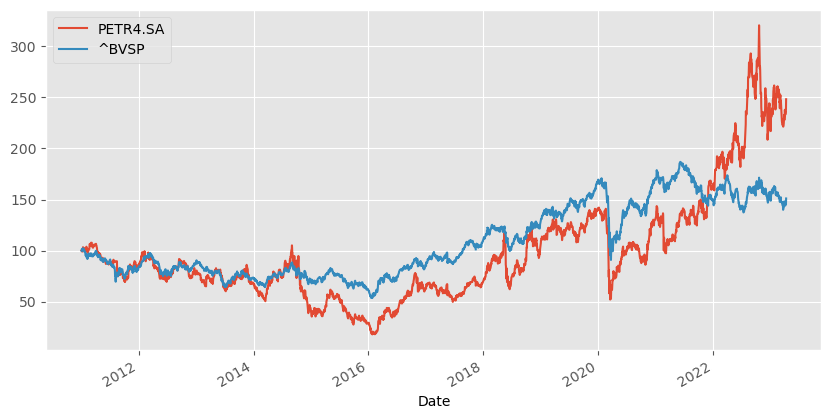

In [49]:
(dados / dados.iloc[0] * 100).plot(figsize=(10, 5))
# iloc[0] seleciona a primeira linha do dataset, [-1] seleciona a última linha

In [50]:
log_returns = np.log(dados / dados.shift(1))

In [51]:
log_returns.mean() * 251  # retorno logarítimico anual

PETR4.SA    0.074909
^BVSP       0.025310
dtype: float64

In [52]:
num_ativos = len(ativos)
# 'num_ativos' será o número de itens dentro da variável 'ativos'

In [53]:
pesos = np.random.random(num_ativos)
pesos /= np.sum(pesos)
# '/=' significa que pesos será fruto do resultado de 'pesos/sum(pesos)'
pesos

array([0.73065437, 0.26934563])

In [54]:
pesos[0] + pesos[1]  # soma é igual a 1, o que significa que está correto

1.0

In [55]:
# Retorno esperado do portfolio
np.sum(pesos * log_returns.mean()) * 251
# calculado pela soma das retornos logarítimicos médios anuais
# np.sum permite a soma de valores em um objeto multidimensional

0.061549994972560196

In [56]:
# Variância esperada do portfolio
np.dot(pesos.T, np.dot(log_returns.cov() * 251, pesos))

0.1593014214157446

In [57]:
# Volatilidade esperada do portfolio
np.sqrt(np.dot(pesos.T, np.dot(log_returns.cov() * 251, pesos)))

0.3991258215346942

In [58]:
# cosiderando 1.000 combinações diferentes dos mesmos ativos

pfolio_returns = []  # lista vazia a ser preenchida pelos retornos
pfolio_volatilities = [] # lista vazia a ser preenchida pelas volatilidades

for x in range (1000):  # loop para repetição de 1000x
    pesos = np.random.random(num_ativos) # gerar aleatoriamente dois pesos para os ativos 
    pesos /= np.sum(pesos) # a soma destes pesos deve ser 1
    pfolio_returns.append(np.sum(pesos * log_returns.mean()) * 251)  # acrescenta à lista pfolio_returns o resultado da aplicação da fórmula do retorno esperado do portfolio
    pfolio_volatilities.append(np.sqrt(np.dot(pesos.T, np.dot(log_returns.cov() * 251, pesos))))  # acrescenta à lista pfolio_returns o resultado da aplicação da fórmula da volatilidade esperada do portfolio

# Agora, vamos criar arrays numpy para nossos novos dados criados
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

# Apresentar os datasets (warning: long list)
# pfolio_returns, pfolio_volatilities

### Vamos plotar um gráfico com nossos dados:

In [59]:
# criamos um dataframe que contém duas colunas
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})

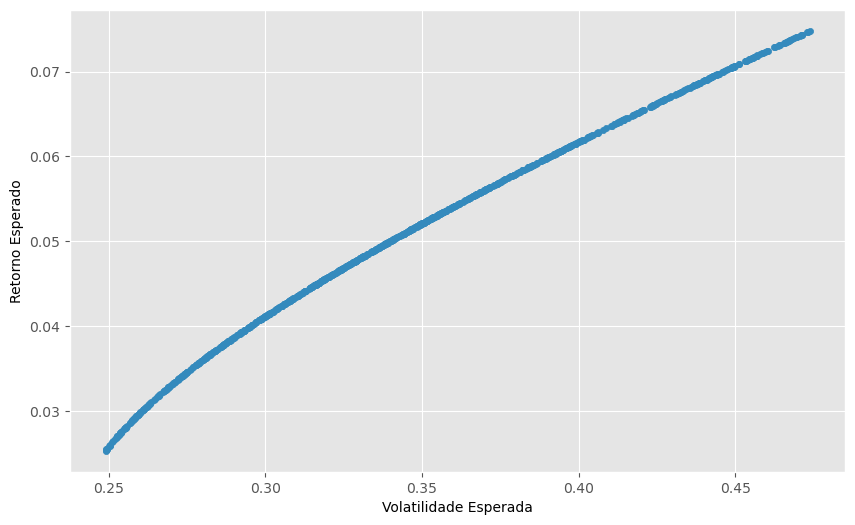

In [60]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade Esperada')
plt.ylabel('Retorno Esperado')
# plt.axis([0, 0.2, 0, 0.2])  # valores de início e fim para X e depois Y
plt.show()

# 7

## BETA e Sharpe:

In [61]:
sec_returns = np.log(dados / dados.shift(1))

In [62]:
cov = sec_returns.cov() * 251  # covariância do ativo com o mercado
cov

,PETR4.SA,^BVSP
PETR4.SA,0.225078,0.088032
^BVSP,0.088032,0.061933


In [63]:
cov_mercado = cov.iloc[0,1]  # covariância entre ação e mercado (via iloc)
cov_mercado

0.08803218163939351

In [64]:
# denominador para a fórmula de beta:
mercado_var = sec_returns['^BVSP'].var() * 251
mercado_var

0.06193257817328235

# 7.1

## Beta

     f o r m u l a

beta = cov(stock, market) / variance of market

Obs.: usually measured with data from the past five years

In [65]:
dados.tail()

,PETR4.SA,^BVSP
Date,,
2023-04-04,24.270000,101869.000000
2023-04-05,24.350000,100978.000000
2023-04-06,24.000000,100822.000000
2023-04-10,24.510000,101847.000000
2023-04-11,25.549999,105680.992188


In [66]:
# quociente da divisão obtida
PETR_beta = cov_mercado / mercado_var
PETR_beta

1.4214196184936234

### BETA < 1 significa que o ativo é defensivo e tem menos chances de sofrer volatilidade
____________________

# 7.2

## Sharpe

     f o r m u l a

Sharpe = ('retorno esperado do ativo' - 'retorno esperado de ativo livre de risco') / 'desvio padrão do ativo'

Ex. de "Ativo Livre de Risco": Brazil 10yr Bond Yield

"Quanto mais alto o Sharpe, melhor"

In [67]:
# retorno esperado de PETR = Brasil 10yr Yield + beta + risco de mercado
re_PETR = 7.37 + PETR_beta * 0.15
re_PETR

7.583212942774043

In [68]:
Sharpe = (re_PETR - 0.02) / (sec_returns['PETR4.SA'].std() * 251 ** 0.5)
Sharpe

15.941890982753247

In [69]:
print(str(round(Sharpe, 5) * 100) + ' %')  # percentualizando

1594.189 %


_______________

# 8

## Precificação de Opções via Black and Scholes:

     f o r m u l a

## C = S * N(d1) - K*(e**-rt) * N(d2)

where:

S = preço do ativo

N = Cumulative Distribution Function

K = preço do strike

e = exponencial

r = retorno do tesouro direto

stdev = desvio padrão

T = horizonte de tempo (anos)

d1 e d2 = ver abaixo

     f o r m u l a  para d1 e d2

d1 = (np.log(S / K) + (r + stdev ** 2 / 2) * T  /  stdev * np.sqrt(t))

d2 = (np.log(S / K) + (r - stdev ** 2 / 2) * T  /  stdev * np.sqrt(t))


onde:

S = preço do ativo

K = preço do strike

r = Brazil 10yr Bond Yield

stdev = desvio padrão

T = horizonte de tempo (anos)

In [70]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T  /  stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T  /  stdev * np.sqrt(T))

In [71]:
norm.cdf(0)
# cumulative distribution function: mostra como os dados se acumulam ao longo do tempo

0.5

In [72]:
norm.cdf(0.25)

0.5987063256829237

In [73]:
norm.cdf(0.75)

0.7733726476231317

In [74]:
norm.cdf(9)

1.0

In [75]:
# BSF "Black-Scholes Formula"
def BSF(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [77]:
ticker = 'PETR4.SA'
data = pd.DataFrame()
data[ticker] = wb.get_data_yahoo('PETR4.SA', start="2018-1-1", end="2023-04-11")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [78]:
data.tail()

,PETR4.SA
Date,
2023-04-03,24.49
2023-04-04,24.27
2023-04-05,24.35
2023-04-06,24.00
2023-04-10,24.51


In [79]:
S = data.iloc[-1]  # '-1' no operador de index para apresentar o preço atual do ativo
S

PETR4.SA    24.51
Name: 2023-04-10 00:00:00, dtype: float64

In [80]:
log_returns = np.log(1 + data.pct_change())

In [81]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PETR4.SA    0.489392
dtype: float64

In [82]:
r = 7.37  # retorno de ativo livre de risco (Brasil 10yr Yield)
K = 30.0  # preço do strike (R$ 30.00)
T = 0.068493  # horizonte de tempo em fração de ano (1/12 = 0.08)

In [83]:
d1(S, K, r, stdev, T)

PETR4.SA    0.072218
dtype: float64

In [84]:
d2(S, K, r, stdev, T)

PETR4.SA    0.063445
dtype: float64

In [85]:
BSF(S, K, r, stdev, T)

PETR4.SA    3.448037
Name: 2023-04-10 00:00:00, dtype: float64